# 多因子模型MFM

理论上多因子模型应涵盖包含股票、债券、大宗商品、地产等所有资产，但我们的讨论仅局限在股票的二级市场。

作为量化选股多因子𝐴𝑙𝑝ℎ𝑎模型构建环节中最重要的一部分，如何寻找具有逻辑支撑且能有效区分和预测股票收益的因子是主要内容。

大部分机构投资者主要研究Alpha模型，风险模型和组合优化采用外购商业软件（BARRA,Axioma等）

风险模型：任意股票同一时刻都暴露于多种不同的风险因素下，它们之间的共同作用形成了股票价格的波动，为了定量研究各种风险因素的作用，量化风险模型应运而生。

风险模型的意义在于找到股票价格波动的成因，并将股票收益来源进行剥离，并实行对未来股票波动价格的预测。

Alpha因子：是对股票收益率具有明显显著且稳定影响的某一变量，同时该影响是剔除其余所有因子对收益的作用而独立存在的。

“群众型”:更符合分散风险的量化投资基本原理，大型的Alpha因子库在提供多样的Alpha源的而同时，也带来了大量的无效和重复信息，会使得不同的Alpha源被人为的放大或缩小权重，最终影响组合表现。

对于一个新的因子，需要思考：是否提供了新的Alpha源？或只是把现有的因子库信息进行了切分重组？

对于因子相关性检验：IC协方差矩阵的估计（改进:压缩估计量、Boostrap方法）

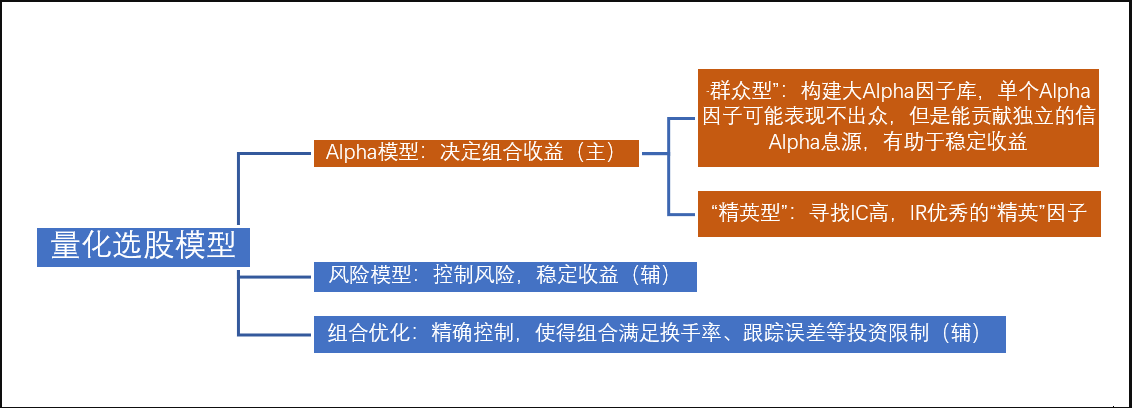

# **多因子模型的构建**

多因子模型是个较为复杂的体系，模型的构建流程往往包括以下几个方面：

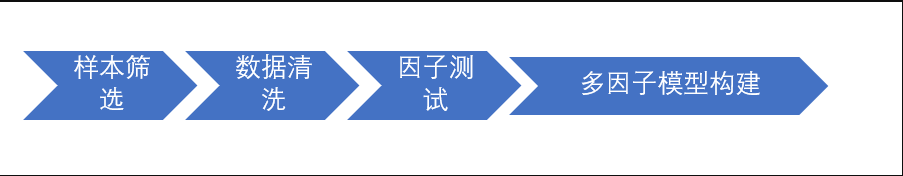

## **样本筛选**
全体 A 股 ，为了使测试结果更符合投资逻辑，设定了三条样本筛选规则：

（1） 剔除选股日的 ST/PT 股票；

（2） 剔除上市不满一年的股票；

（3） 剔除选股日由于停牌等原因而无法买入的股票。

## **数据清洗**
避免可能的数据错误和极端数据对测试结果产生影响，使用标准化后的数据保证最终得到的模型的稳健性。数据清洗的内容主要包括两部分，异常值和缺失值的处理。

常见的因子标准化方法包括：Z 值标准化（Z-Score），Rank 标准化，风格 标准化等等。 由于 Rank 标准化后的数据会丢失原始样本的一些重要信息，这里我们仍然 选择 Z 值标准化来处理因子数据。

## **因子测试**
有效的单因子首先应该具有一定的逻辑支撑，其次则是与股票收益率的相关性较为显著

单因子测试
截面回归（Cross-Section Regression）是目前业界较常用于因子测试的方法，相比全样本面板回归（Panel Data Regression）的方法，截面回归更有利于对因子变化趋势的捕捉。

我们选择每期针对全体样本做一次回归，回归时因子暴露为已知变量，回归 得到每期的一个因子收益值𝑓𝑗，在通过多期回归后我们就可以得到因子值𝑓𝑗 的序列，也就是因子收益率序列，同时可以得到 t 值序列，也就是因子值与 股票收益率相关性的t检验得到的t值。

针对这两个序列我们将通过以下几个指标来判断 该因子的有效性以及稳定性：

（1） 因子收益序列𝑓𝑖的假设检验 t 值

（2） 因子收益序列𝑓𝑖大于 0 的概率

（3） t 值绝对值的均值

（4） t 值绝对值大于等于 2 的概率

IC 值（信息系数）是指个股第 t 期在因子 i 上的因子暴露（剔除行业与市值 后）与 t + 1 期的收益率的相关系数。通过计算 IC 值可以有效的观察到某个因子收益率预测的稳定性和动量特征，以便在优化组合时用作筛选的指标。 常见的计算 IC 值方法有两种：相关系数（Pearson Correlation） 和秩相关系数（ Spearman Rank Correlation）。

由于 Pearson 相关系数计算时假设变量具有相等间隔以及服从正态分布，而 这一假设往往与因子值和股票收益率的分布情况相左。因此我们将采用 Spearman 的方法计算因子暴露与下期收益率的秩相关性 IC 值。类似回归法 的因子测试流程，我们在计算 IC 时同样考虑剔除了行业因素与市值因素。

同样我们会得到一个 IC 值序列，类似的，我们将关注以下几个与 IC 值相关 的指标来判断因子的有效性和预测能力：

（1） IC 值的均值

（2） IC 值的标准差

（3） IC 大于 0 的比例

（4） IC 绝对值大于 0.02 的比例

（5） IR （IR = IC 均值/IC 标准差）

### **多因子测试**
在完成单个因子的测试之后，就为多因子模型的构建打下了坚实的基础。我们可以通过下面几个步骤来剔除同类因子之间的多重共线性影响，筛选出同时具有良好的单调性和预测性的有效因子，构造我们的多因子模型：

根据上文的截面回归因子测试方法，我们可以轻松的得到每个因子的因子暴 露值序列和因子 IC 值序列。在研究因子间共线性时，就可以通过计算因子 间 IC 值和因子暴露值得相关性来求证因子间的共线性。

需要注意的是，经济含义相似度较高的同类型因子往往存在明显的正相关性， 在处理此类因子时，我们可以通过一些方法将因子进行合并；而如果是经济 含义差异较大因子之间存在明显相关性，就需要有所取舍。

消除共线性的方法包括以下几种：

（1） 在同类因子的共线性较大的几个因子中，保留有效性最高的因子， 剔除余下的因子

（2） 因子组合：方法包括等权加权，以因子收益 f 为权重加权，以及 PCA 主成分分析法等等

（3） 暴力迭代法，即将因子两两组合暴力迭代得到表现最好的组合方法。

在对因子集做残差的异方差分析处理之后，就可以进行多元线性回归，估计每期的因子收益序列。

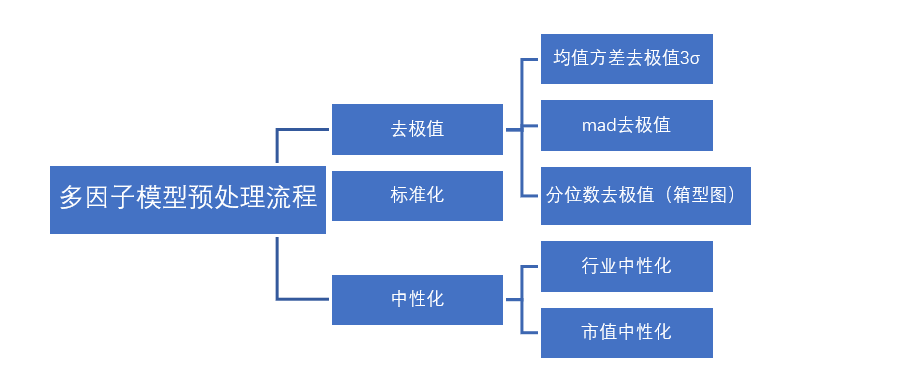

## **因子的初步筛选**
对每个因子做详尽的分析，具体测试了包括因子收益，因子收益显著性， 因子 IC、IR，分层回溯收益、多空收益，历史 IC 序列相关性等等指标，一般根据前期的测试结果，筛选出了收益率较显著，高 IC、IR 并且单调性得分较高的因子。

### **因子权重的优化—基于因子 IC**
静态因子加权 v.s.动态调整权重

静态优化IC
复合因子是M 个因子的一个线形组合：因子的 IR 值为因子 IC 的均值与因子 IC 的标准差的比值。因子 IR 值越高， 代表因子综合考虑区分度和稳定性后效果越好,优化目标是使复合因子的信息比 IR 取到最大值。

动态最优化IR
虑到市场环境变化和风格转变等原因会使得因子的有效性和 IC 值出现波 动，仅仅使用静态的 IC 优化方法给定复合因子中的因子权重会容易导致组 合受风格变化影响而出现较大的波动和回撤，构造了一个动态调整的基于 IC 值的复合因子 IR 最优化模型。

动态的最优化权重模型是建立在上面我们提到的静态最优化 IR 模型的基础上的，假设每期优化因子权重时所参考的历史 IC 序列长度为 N 个月。（首先假设组合股票数量为 M=100，手续费单边 0.3%，每月初调仓，则在不 同的参数 N 下）

一般动态的最优化 IR 赋权方法要优于静态的因子赋权法

## **因子赋权组合**
组合内等权 v.s.复合因子得分加权 在构建每月调仓组合时，入选标的的赋权方式包括等权和按复合因子的得分加权两种方法。

（EW 为等权，SW 为复合因子得分加权）

# **因子中性化**
原因：A股的行业轮动明显，行业热点之间切换迅速，并且A股小市值个股占比明显，高波动率高收益率

目的：

* 降低投资组合的波动性和回测
* 为了在用某一因子时能够剔除其他因素的影响，使得选出的股票更加分散，需要进行中性化处理
* 为了消除因子中的偏差和不必要的影响
对于因子来说，中性化主要考虑市场风险和行业风险。

行业中性:多头组合的行业配置与对冲基准的行业配置一致，目的在于剔除行业因子对策略收益的影响，仅考察行业内部个股的超额收益。（行业中性策略的净值曲线往往比较平稳，回测较小）

风格因子中性:多头组合的风格因子较之对冲基准的风险暴露为0，目的在于使多头组合的风格特征完全与对冲基准相匹配，使得组合的超额收益不是来自于某类风格

1. 行业中性化

   行业中性化一般采用两种方式处理

   * 简单的标准化法

     利用申万行业指数，将各个行业的因子进行标准化处理，即减去均值除以标准差

   * 回归取残差法

     将因子值作为y，行业哑变量作为x，进行线性回归，回归模型的残差即为行业中性化后的因子值

2. 市值中性化

   因为市值因子是连续的，采用回归残差法